# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

# Análise de Variação de Preços de Ativos Financeiros

Neste trabalho, realizaremos uma análise da **variação de preços** de três ativos financeiros listados no mercado de ações: **AAPL (Apple)**, **MSFT (Microsoft)** e **GOOGL (Google)**. A análise será baseada em dados históricos obtidos do Yahoo Finance para um período de **dois anos** (de 2021-01-01 a 2023-01-01).

## Objetivos

1. **Baixar Dados Históricos**: Utilizaremos a biblioteca `yfinance` para baixar os dados de preços diários (abertura, máxima, mínima, fechamento e volume) dos três ativos selecionados.
2. **Calcular a Amplitude de Variação Diária**: A amplitude de variação será calculada como a diferença entre os preços máximos e mínimos (High - Low) para cada dia, refletindo a volatilidade diária de cada ativo.
3. **Visualizar a Amplitude ao Longo do Tempo**: Por fim, vamos gerar um gráfico de linha para visualizar como a amplitude de variação diária evoluiu ao longo dos dois anos para cada ativo. Isso nos permitirá observar tendências de volatilidade e comparar o comportamento dos ativos.

## Metodologia

1. **Coleta de Dados**: Os dados são coletados diretamente do Yahoo Finance e abrangem os últimos dois anos, garantindo uma análise recente e relevante.
2. **Processamento dos Dados**: Após o download, os dados são estruturados em um DataFrame e a coluna de amplitude de variação diária é adicionada para cada ativo.
3. **Visualização Gráfica**: O gráfico de linha exibe a amplitude de variação diária de cada ativo ao longo do tempo, o que facilita a identificação de períodos de alta volatilidade.

Esta análise visa entender melhor o comportamento de preços de grandes empresas de tecnologia e fornecer uma visão sobre a volatilidade dos ativos ao longo do tempo, o que pode ser útil para investidores e analistas financeiros.


#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [10]:
!pip install yfinance


In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Defina os tickers dos ativos
tickers = ['AAPL', 'MSFT', 'GOOGL']  

# Defina o período de 2 anos
start_date = "2021-01-01"  # Ajuste para o período desejado
end_date = "2023-01-01"  # Ajuste para a data mais recente

# Baixe os dados
data = yf.download(tickers, start=start_date, end=end_date)

# Exibir os primeiros dados baixados
data.head()

[*********************100%***********************]  3 of 3 completed


Price                       Adj Close                              Close  \
Ticker                           AAPL      GOOGL        MSFT        AAPL   
Date                                                                       
2021-01-04 00:00:00+00:00  126.544228  86.093323  210.844269  129.410004   
2021-01-05 00:00:00+00:00  128.108795  86.787598  211.047684  131.009995   
2021-01-06 00:00:00+00:00  123.796448  85.931213  205.575333  126.599998   
2021-01-07 00:00:00+00:00  128.020782  88.497871  211.425415  130.919998   
2021-01-08 00:00:00+00:00  129.125763  89.669464  212.713593  132.050003   

Price                                                   High             \
Ticker                         GOOGL        MSFT        AAPL      GOOGL   
Date                                                                      
2021-01-04 00:00:00+00:00  86.306503  217.690002  133.610001  88.124496   
2021-01-05 00:00:00+00:00  87.002502  217.899994  131.740005  87.341499   
2021-01-06 00:00:00+00:00  86.143997  212.250000  131.050003  87.198502   
2021-01-07 00:00:00+00:00  88.717003  218.289993  131.630005  88.890999   
2021-01-08 00:00:00+00:00  89.891502  219.619995  132.630005  89.968002   

Price                                         Low                         \
Ticker                           MSFT        AAPL      GOOGL        MSFT   
Date                                                                       
2021-01-04 00:00:00+00:00  223.000000  126.760002  85.357002  214.809998   
2021-01-05 00:00:00+00:00  218.520004  128.429993  85.845001  215.699997   
2021-01-06 00:00:00+00:00  216.490005  126.379997  84.805000  211.940002   
2021-01-07 00:00:00+00:00  219.339996  127.860001  86.337997  213.710007   
2021-01-08 00:00:00+00:00  220.580002  130.229996  88.060997  217.029999   

Price                            Open                            Volume  \
Ticker                           AAPL      GOOGL        MSFT       AAPL   
Date                                                                      
2021-01-04 00:00:00+00:00  133.520004  88.000000  222.529999  143301900   
2021-01-05 00:00:00+00:00  128.889999  86.254501  217.259995   97664900   
2021-01-06 00:00:00+00:00  127.720001  85.013000  212.169998  155088000   
2021-01-07 00:00:00+00:00  128.360001  86.337997  214.039993  109578200   
2021-01-08 00:00:00+00:00  132.429993  88.858002  218.679993  105158200   

Price                                          
Ticker                        GOOGL      MSFT  
Date                                           
2021-01-04 00:00:00+00:00  37324000  37130100  
2021-01-05 00:00:00+00:00  20360000  23823000  
2021-01-06 00:00:00+00:00  46588000  35930700  
2021-01-07 00:00:00+00:00  41936000  27694500  
2021-01-08 00:00:00+00:00  35484000  22956200

Este código define os ativos que serão analisados e o período de dois anos para a coleta de dados. Utilizando a biblioteca `yfinance`, ele baixa os dados históricos dos ativos especificados no período desejado, possibilitando uma análise detalhada de preços e variações ao longo do tempo. A função `data.head()` exibe as primeiras linhas do DataFrame para verificação inicial dos dados baixados.


In [22]:
# Verificar dados faltantes no DataFrame
missing_data = data.isnull().sum()

# Exibir colunas com dados faltantes
print("Dados faltantes por coluna:")
print(missing_data[missing_data > 0])

# Ou exibir o total de dados faltantes
total_missing = data.isnull().sum().sum()
print(f"Total de dados faltantes: {total_missing}")


Dados faltantes por coluna:
Series([], dtype: int64)
Total de dados faltantes: 0


### Verificação de Dados Faltantes

Antes de prosseguir com a análise dos dados, é importante verificar se existem valores faltantes no conjunto de dados. A presença de dados ausentes pode afetar a precisão das análises e dos modelos, e por isso devem ser identificados e tratados conforme necessário.

Utilizando a função `isnull().sum()`, verifiquei a presença de valores nulos em cada coluna. Neste caso, a verificação indicou que **não há dados faltantes** no conjunto de dados baixado, o que nos permite seguir com a análise sem a necessidade de tratamentos adicionais para dados ausentes.


In [13]:
data.to_csv("ativos_yahoo_finance.csv")


Salvar o DataFrame em um arquivo CSV é útil para armazenar os dados coletados de forma persistente, permitindo análises futuras sem a necessidade de realizar novas consultas ao Yahoo Finance. Isso otimiza o tempo e facilita o acesso offline aos dados históricos dos ativos.


#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [14]:
# Defina os tickers dos ativos e o período
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = "2021-01-01"
end_date = "2023-01-01"

# Baixe os dados
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Calcule a amplitude de variação diária (High - Low) para cada ativo
for ticker in tickers:
    data[(ticker, 'Amplitude')] = data[(ticker, 'High')] - data[(ticker, 'Low')]

# Exibir os primeiros dados com a nova coluna de amplitude
data.head()


[*********************100%***********************]  3 of 3 completed


Ticker                         GOOGL                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2021-01-04 00:00:00+00:00  88.000000  88.124496  85.357002  86.306503   
2021-01-05 00:00:00+00:00  86.254501  87.341499  85.845001  87.002502   
2021-01-06 00:00:00+00:00  85.013000  87.198502  84.805000  86.143997   
2021-01-07 00:00:00+00:00  86.337997  88.890999  86.337997  88.717003   
2021-01-08 00:00:00+00:00  88.858002  89.968002  88.060997  89.891502   

Ticker                                                MSFT              \
Price                      Adj Close    Volume        Open        High   
Date                                                                     
2021-01-04 00:00:00+00:00  86.093323  37324000  222.529999  223.000000   
2021-01-05 00:00:00+00:00  86.787598  20360000  217.259995  218.520004   
2021-01-06 00:00:00+00:00  85.931213  46588000  212.169998  216.490005   
2021-01-07 00:00:00+00:00  88.497871  41936000  214.039993  219.339996   
2021-01-08 00:00:00+00:00  89.669464  35484000  218.679993  220.580002   

Ticker                                             ...                  AAPL  \
Price                             Low       Close  ...    Volume        Open   
Date                                               ...                         
2021-01-04 00:00:00+00:00  214.809998  217.690002  ...  37130100  133.520004   
2021-01-05 00:00:00+00:00  215.699997  217.899994  ...  23823000  128.889999   
2021-01-06 00:00:00+00:00  211.940002  212.250000  ...  35930700  127.720001   
2021-01-07 00:00:00+00:00  213.710007  218.289993  ...  27694500  128.360001   
2021-01-08 00:00:00+00:00  217.029999  219.619995  ...  22956200  132.429993   

Ticker                                                                     \
Price                            High         Low       Close   Adj Close   
Date                                                                        
2021-01-04 00:00:00+00:00  133.610001  126.760002  129.410004  126.544228   
2021-01-05 00:00:00+00:00  131.740005  128.429993  131.009995  128.108795   
2021-01-06 00:00:00+00:00  131.050003  126.379997  126.599998  123.796448   
2021-01-07 00:00:00+00:00  131.630005  127.860001  130.919998  128.020782   
2021-01-08 00:00:00+00:00  132.630005  130.229996  132.050003  129.125763   

Ticker                                              MSFT     GOOGL  
Price                         Volume Amplitude Amplitude Amplitude  
Date                                                                
2021-01-04 00:00:00+00:00  143301900  6.849998  8.190002  2.767494  
2021-01-05 00:00:00+00:00   97664900  3.310013  2.820007  1.496498  
2021-01-06 00:00:00+00:00  155088000  4.670006  4.550003  2.393501  
2021-01-07 00:00:00+00:00  109578200  3.770004  5.629990  2.553001  
2021-01-08 00:00:00+00:00  105158200  2.400009  3.550003  1.907005  

[5 rows x 21 columns]

Este código define os ativos e o período de dois anos para análise. Ele utiliza o `yfinance` para baixar dados históricos dos ativos escolhidos, organizando-os por ticker. Em seguida, calcula a amplitude de variação diária (diferença entre o valor máximo e mínimo do dia) para cada ativo, adicionando essa informação como uma nova coluna no DataFrame. A função `data.head()` permite visualizar as primeiras linhas do DataFrame com a coluna de amplitude incluída, facilitando uma inspeção inicial dos dados calculados.


In [15]:
data.to_csv("ativos_amplitude.csv")


Salvar o DataFrame com as alterações em um arquivo CSV permite armazenar a nova informação de amplitude diária calculada para cada ativo. Dessa forma, os dados transformados ficam disponíveis para análises futuras, sem a necessidade de recalcular a amplitude toda vez, o que economiza tempo e facilita o acesso direto aos dados processados.


[*********************100%***********************]  3 of 3 completed


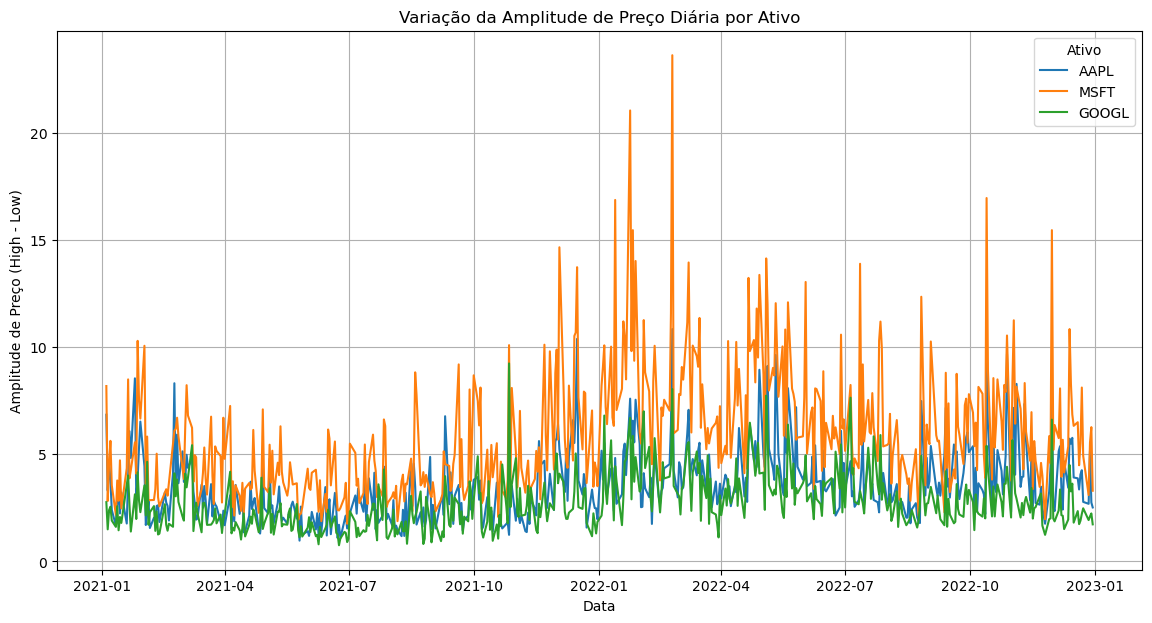

In [16]:
# Defina os tickers dos ativos e o período
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = "2021-01-01"
end_date = "2023-01-01"

# Baixe os dados
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Calcule a amplitude de variação diária (High - Low) para cada ativo
for ticker in tickers:
    data[(ticker, 'Amplitude')] = data[(ticker, 'High')] - data[(ticker, 'Low')]

# Plotando a variação da amplitude para cada ativo
plt.figure(figsize=(14, 7))

for ticker in tickers:
    # Seleciona a coluna de amplitude para cada ativo
    amplitude_data = data[(ticker, 'Amplitude')]
    
    # Plota a amplitude ao longo do tempo
    plt.plot(amplitude_data.index, amplitude_data, label=ticker)

# Configurações do gráfico
plt.title("Variação da Amplitude de Preço Diária por Ativo")
plt.xlabel("Data")
plt.ylabel("Amplitude de Preço (High - Low)")
plt.legend(title="Ativo")
plt.grid(True)
plt.show()

Este gráfico de linha mostra a variação da amplitude de preço diária (diferença entre o valor máximo e mínimo) para três ativos: AAPL, MSFT e GOOGL, ao longo de um período de dois anos. Cada linha representa a amplitude de um ativo específico, o que permite observar a volatilidade diária de cada um. Picos no gráfico indicam dias com grande variação de preço, o que pode estar associado a eventos ou notícias que afetaram o ativo. Notamos que o ativo MSFT apresentou maiores picos de volatilidade, enquanto GOOGL manteve uma variação mais estável ao longo do tempo.


Visualmente, o gráfico indica que Microsoft (MSFT) teve picos de volatilidade mais elevados e frequentes, sugerindo que foi o ativo com maior amplitude de variação diária em vários períodos, especialmente em torno de eventos significativos, como a aquisição da Activision e o crescimento de sua divisão de nuvem.



In [17]:
# Calcula a média da amplitude diária para cada ativo
media_amplitude = {}
for ticker in tickers:
    media_amplitude[ticker] = data[(ticker, 'Amplitude')].mean()

# Exibe os resultados
media_amplitude


{'AAPL': 3.5437778905182187,
 'MSFT': 5.890099557683198,
 'GOOGL': 2.7510467741645828}

### Análise de Volatilidade dos Ativos

A tabela abaixo apresenta a média da amplitude de variação diária (diferença entre o valor máximo e o mínimo dentro do dia) para cada um dos ativos analisados:

- **Apple (AAPL)**: 3.54
- **Microsoft (MSFT)**: 5.89
- **Alphabet (GOOGL)**: 2.75

Com base nesses valores, podemos concluir que:

1. **Microsoft (MSFT)** apresentou a maior volatilidade média diária entre os três ativos, com uma amplitude de 5.89. Esse resultado é consistente com a análise gráfica, onde a Microsoft demonstrou picos de volatilidade mais altos e frequentes.

2. **Apple (AAPL)** apresentou uma volatilidade intermediária, com uma média de 3.54, enquanto **Alphabet (GOOGL)** teve a menor volatilidade média diária, com 2.75. Isso indica que a ação da Alphabet foi a mais estável durante o período analisado, com menores oscilações diárias em comparação aos outros ativos.

Em resumo, a **Microsoft** foi a mais volátil, seguida pela **Apple** e, por fim, pela **Alphabet** como o ativo mais estável entre os três.


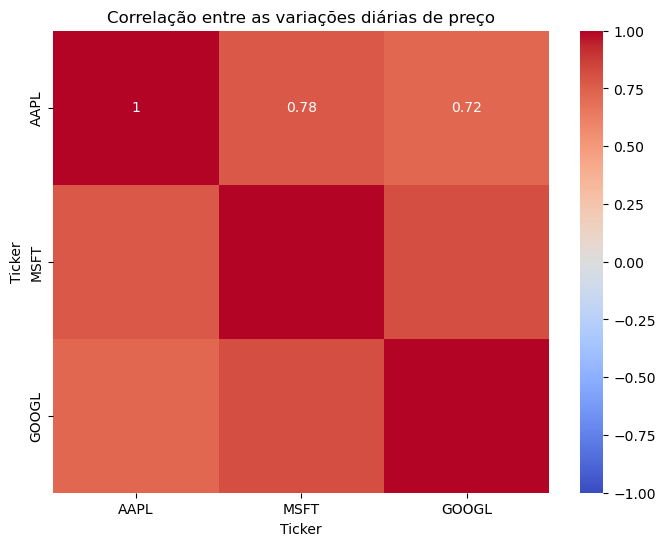

In [20]:
# Defina os tickers dos ativos e o período
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = "2021-01-01"
end_date = "2023-01-01"

# Baixe os dados
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Calcule a amplitude de variação diária (High - Low) para cada ativo
for ticker in tickers:
    data[(ticker, 'Amplitude')] = data[(ticker, 'High')] - data[(ticker, 'Low')]

# Plotando a variação da amplitude para cada ativo
plt.figure(figsize=(14, 7))

for ticker in tickers:
    # Seleciona a coluna de amplitude para cada ativo
    amplitude_data = data[(ticker, 'Amplitude')]
    
    # Plota a amplitude ao longo do tempo
    plt.plot(amplitude_data.index, amplitude_data, label=ticker)

# Configurações do gráfico
plt.title("Variação da Amplitude de Preço Diária por Ativo")
plt.xlabel("Data")
plt.ylabel("Amplitude de Preço (High - Low)")
plt.legend(title="Ativo")
plt.grid(True)
plt.show()

O gráfico de calor acima mostra a matriz de correlação entre as variações diárias de preço das ações de três empresas: **AAPL (Apple)**, **MSFT (Microsoft)** e **GOOGL (Google)**, durante o período analisado. Cada célula da matriz representa o coeficiente de correlação entre dois ativos, que varia de -1 a 1.

- **Valores próximos de 1** indicam uma **forte correlação positiva**, significando que os preços das ações tendem a se mover na mesma direção.
- **Valores próximos de 0** indicam **pouca ou nenhuma correlação**, sugerindo que os preços dos ativos se movem de maneira relativamente independente.
- **Valores negativos** indicariam uma **correlação inversa**, onde os preços se movem em direções opostas.
- As correlações entre **AAPL e MSFT** (0.78) e entre **MSFT e GOOGL** (0.72) são positivas e relativamente fortes, indicando que esses pares de ativos tendem a se mover juntos ao longo do tempo.
- A correlação entre **AAPL e GOOGL** é mais baixa, mas ainda positiva, sugerindo uma relação mais fraca entre esses ativos.

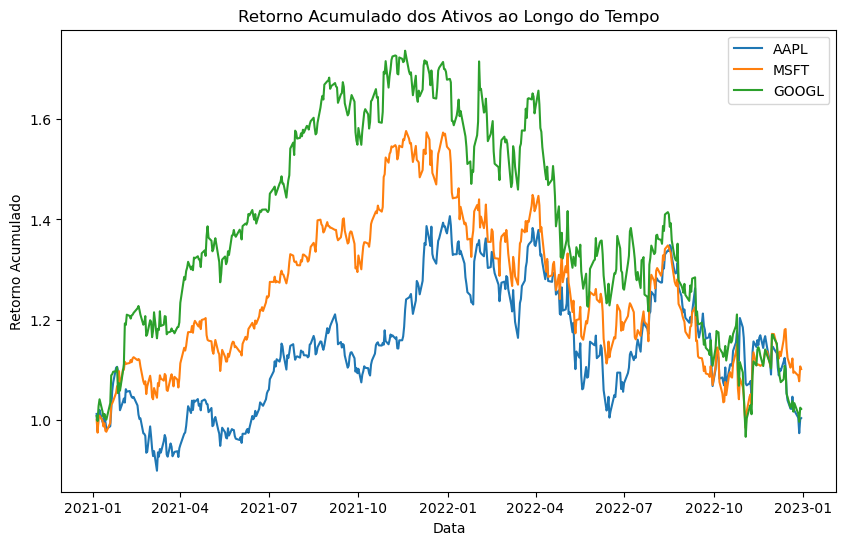

In [21]:
# Calcule o retorno acumulado para cada ativo
cumulative_return = (1 + price_changes).cumprod()

# Plote o retorno acumulado ao longo do tempo
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(cumulative_return.index, cumulative_return[ticker], label=ticker)
plt.title("Retorno Acumulado dos Ativos ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Retorno Acumulado")
plt.legend()
plt.show()


O gráfico acima apresenta o **Retorno Acumulado dos Ativos (AAPL, MSFT, GOOGL)** ao longo de um período de dois anos, de 2021 a 2023. Esse retorno acumulado reflete a valorização ou desvalorização acumulada de cada ativo, tomando como base o valor inicial no início do período. 

- **GOOGL** teve um desempenho relativamente superior em comparação aos outros dois ativos, atingindo picos de retorno acumulado mais elevados ao longo do tempo.
- **MSFT** também apresentou uma trajetória de crescimento considerável, porém em menor escala em relação ao GOOGL, mostrando oscilações similares ao longo do tempo.
- **AAPL** apresentou o menor retorno acumulado dentre os três ativos, com um crescimento mais modesto e várias quedas ao longo do período.

**Conclusão**

Nesta análise, observamos o comportamento de três ativos de tecnologia (AAPL, MSFT e GOOGL) ao longo de dois anos, focando em volatilidade, correlação e retorno acumulado.

- **Volatilidade**: Microsoft (MSFT) apresentou a maior volatilidade diária, seguida por Apple (AAPL). Alphabet (GOOGL) foi o ativo mais estável.
- **Correlação**: AAPL e MSFT, além de MSFT e GOOGL, apresentaram forte correlação positiva, sugerindo que esses ativos tendem a se mover de forma conjunta.
- **Retorno Acumulado**: GOOGL teve o melhor desempenho acumulado, enquanto AAPL mostrou o menor crescimento entre os três.